In [1]:
from pandas_datareader import data as wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats

In [2]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [3]:
PG.head()

High       Low      Open     Close     Volume  Adj Close
Date                                                                    
1995-01-03  15.62500  15.43750  15.46875  15.59375  3318400.0   8.215732
1995-01-04  15.65625  15.31250  15.53125  15.46875  2218800.0   8.149876
1995-01-05  15.43750  15.21875  15.37500  15.25000  2319600.0   8.034625
1995-01-06  15.40625  15.15625  15.15625  15.28125  3438000.0   8.051086
1995-01-09  15.40625  15.18750  15.34375  15.21875  1795200.0   8.018162

In [4]:
PG.tail()

High         Low        Open       Close     Volume  \
Date                                                                    
2020-12-22  138.070007  136.380005  137.289993  136.550003  5023100.0   
2020-12-23  137.550003  136.130005  137.389999  136.339996  6004200.0   
2020-12-24  138.130005  136.199997  136.199997  137.720001  2588200.0   
2020-12-28  139.389999  137.949997  138.149994  138.679993  3714700.0   
2020-12-29  139.940002  138.199997  139.220001  138.419998  5139300.0   

             Adj Close  
Date                    
2020-12-22  136.550003  
2020-12-23  136.339996  
2020-12-24  137.720001  
2020-12-28  138.679993  
2020-12-29  138.419998

# Rate of return

In [5]:
PG['rate_ret'] = PG['Adj Close'] / PG['Adj Close'].shift(1) - 1
print(PG)

                  High         Low        Open       Close     Volume  \
Date                                                                    
1995-01-03   15.625000   15.437500   15.468750   15.593750  3318400.0   
1995-01-04   15.656250   15.312500   15.531250   15.468750  2218800.0   
1995-01-05   15.437500   15.218750   15.375000   15.250000  2319600.0   
1995-01-06   15.406250   15.156250   15.156250   15.281250  3438000.0   
1995-01-09   15.406250   15.187500   15.343750   15.218750  1795200.0   
...                ...         ...         ...         ...        ...   
2020-12-22  138.070007  136.380005  137.289993  136.550003  5023100.0   
2020-12-23  137.550003  136.130005  137.389999  136.339996  6004200.0   
2020-12-24  138.130005  136.199997  136.199997  137.720001  2588200.0   
2020-12-28  139.389999  137.949997  138.149994  138.679993  3714700.0   
2020-12-29  139.940002  138.199997  139.220001  138.419998  5139300.0   

             Adj Close  rate_ret  
Date           

In [6]:
# or just apply pct_change() method
# PG['Adj Close'].pct_change()

## Logarithmic rate of return

In [7]:
np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2020-12-22   -0.007079
2020-12-23   -0.001539
2020-12-24    0.010071
2020-12-28    0.006946
2020-12-29   -0.001877
Name: Adj Close, Length: 6545, dtype: float64

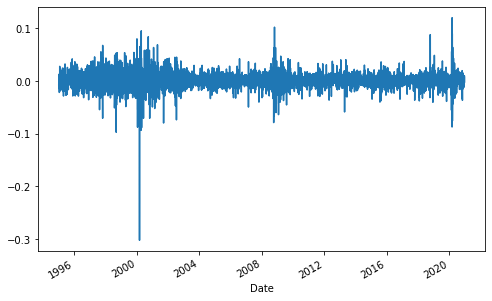

In [8]:
PG['rate_ret'].plot(figsize=(8,5))
plt.show()

### calculating mean of returns

In [9]:
PG['rate_ret'].mean()

0.0005340951094406696

### calculating mean of simple return on annual basis

In [10]:
PG['rate_ret'].mean() * 250

0.1335237773601674

Annual rate of return for (250 trading days) is around 13.3 %

### calculating logarithmic return on annual basis

In [11]:
PG['log_rate_ret'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))

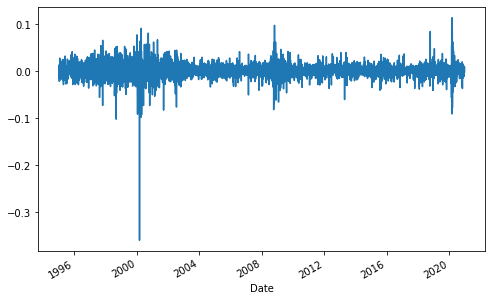

In [12]:
PG.log_rate_ret.plot(figsize=(8,5))
plt.show()

In [13]:
PG['log_rate_ret'].mean() * 250

0.1078943200461276

# it seems logarithmic returns is lower compared to simple rate of return on annual basis

# <font color='red'>  RULE!!! USE SIMPLE RATE OF RETURN FOR MULTIPLE STOCKS OVER SAME PERIOD WHEREAS LOGARITHMIC FOR ONE OR FEW STOCKS OVER MULTIPLE PERIODS </font>

In [14]:
ticker_l = ['PG', 'MSFT', 'F', 'GE']
my_data = pd.DataFrame()

for t in ticker_l:
    my_data[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [15]:
my_data.head()

PG      MSFT         F        GE
Date                                              
1995-01-03  8.215732  2.394761  4.242091  4.058363
1995-01-04  8.149876  2.412169  4.356228  4.058363
1995-01-05  8.034625  2.372380  4.318182  4.068309
1995-01-06  8.051086  2.412169  4.318182  4.048415
1995-01-09  8.018162  2.397249  4.394274  4.008627

In [16]:
my_data.tail()

PG        MSFT     F     GE
Date                                           
2020-12-22  136.550003  223.940002  8.79  10.61
2020-12-23  136.339996  221.020004  8.99  10.86
2020-12-24  137.720001  222.750000  8.86  10.65
2020-12-28  138.679993  224.960007  8.89  10.64
2020-12-29  138.419998  224.149994  8.82  10.56

In [17]:
my_data.iloc[0]

PG      8.215732
MSFT    2.394761
F       4.242091
GE      4.058363
Name: 1995-01-03 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

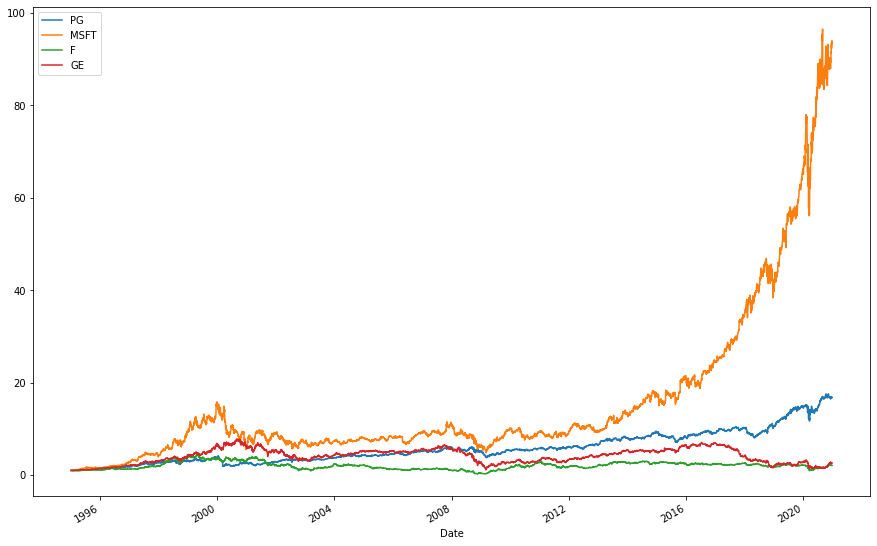

In [18]:
(my_data / my_data.iloc[0]).plot(figsize=(15,10))

### calculating simple rate of return

In [19]:
rate_return = my_data/my_data.shift(1) - 1

In [20]:
print(rate_return)

                  PG      MSFT         F        GE
Date                                              
1995-01-03       NaN       NaN       NaN       NaN
1995-01-04 -0.008016  0.007269  0.026906  0.000000
1995-01-05 -0.014141 -0.016495 -0.008734  0.002451
1995-01-06  0.002049  0.016772  0.000000 -0.004890
1995-01-09 -0.004089 -0.006185  0.017621 -0.009828
...              ...       ...       ...       ...
2020-12-22 -0.007054  0.006065 -0.015678 -0.014856
2020-12-23 -0.001538 -0.013039  0.022753  0.023563
2020-12-24  0.010122  0.007827 -0.014461 -0.019337
2020-12-28  0.006971  0.009921  0.003386 -0.000939
2020-12-29 -0.001875 -0.003601 -0.007874 -0.007519

[6545 rows x 4 columns]


In [21]:
annual_rate = rate_return.mean() * 250

In [22]:
print(annual_rate)

PG      0.133524
MSFT    0.223419
F       0.107527
GE      0.087797
dtype: float64


In [23]:
weights = np.array([.25, .25, .25, .25])

In [24]:
portfolio1_rate_ret = np.dot(annual_rate, weights)

In [25]:
print(portfolio1_rate_ret)

0.13806662490272223


In [26]:
weights_n = np.array([.50, .40, .05, .05])
portfolio2_rate_ret = np.dot(annual_rate, weights_n)
print(portfolio2_rate_ret)

0.16589569950316516


### Market indexes

- S&P
- NASDAQ (it companies)
- Dow & Jones (only 30 large companies)

In [27]:
ticker_l = ['^GSPC', '^IXIC', '^GDAXI',] #  '^FTSE'
my_data = pd.DataFrame()

for t in ticker_l:
    my_data[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']

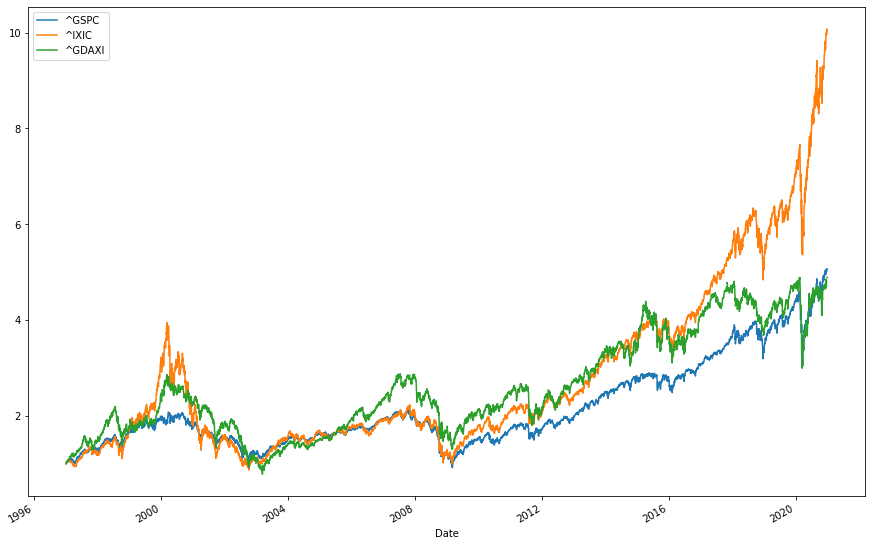

In [28]:
(my_data / my_data.iloc[0]).plot(figsize=(15,10))
plt.show()

In [29]:
rate_return = my_data/my_data.shift(1) - 1
annual_rate = rate_return.mean() * 250

In [30]:
print(annual_rate)

^GSPC     0.086539
^IXIC     0.127256
^GDAXI    0.078698
dtype: float64


# Volatility & Risk of Stock

In [31]:
ticker_l = ['PG', '^GSPC']

sec_data = pd.DataFrame()

for t in ticker_l:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

In [32]:
sec_data.head()

PG        ^GSPC
Date                              
2010-01-04  43.536560  1132.989990
2010-01-05  43.550812  1136.520020
2010-01-06  43.344254  1137.140015
2010-01-07  43.109196  1141.689941
2010-01-08  43.052197  1144.979980

In [33]:
sec_returns = np.log(sec_data /sec_data.shift(1))

In [34]:
sec_returns.head()

PG     ^GSPC
Date                          
2010-01-04       NaN       NaN
2010-01-05  0.000327  0.003111
2010-01-06 -0.004754  0.000545
2010-01-07 -0.005438  0.003993
2010-01-08 -0.001323  0.002878

# PG

In [35]:
sec_returns['PG'].mean() # mean return for PG on daily basis

0.0004181820252940727

In [36]:
sec_returns['PG'].mean() * 250 # mean return of PG on annual basis

0.10454550632351817

In [37]:
sec_returns['PG'].std() # standard deviation of PG on daily basis

0.010808989155680128

In [38]:
sec_returns['PG'].std() * 250 ** 0.5 # standard deviation of PG on annual basis

0.1709051246800477

# return of tickers

In [39]:
sec_returns[['PG', '^GSPC']].mean() * 250

PG       0.104546
^GSPC    0.107624
dtype: float64

# risk & volatility of tickers

In [40]:
sec_returns[['PG', '^GSPC']].std() * 250 ** 0.5

PG       0.170905
^GSPC    0.174955
dtype: float64

# Covariance & Correlation

In [41]:
sec_returns.cov()

PG     ^GSPC
PG     0.000117  0.000071
^GSPC  0.000071  0.000122

In [42]:
sec_returns.corr()

PG    ^GSPC
PG     1.00000  0.59621
^GSPC  0.59621  1.00000

In [43]:
cov = sec_returns.cov()['PG']['^GSPC']/(sec_returns['PG'].std() * sec_returns['^GSPC'].std())
print(cov)

0.5962096700787516


# Portfolio Risk

## Variance

In [44]:
weights = np.array([.5, .5])

In [45]:
variance  = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))

In [46]:
print(variance)

0.023868048033628866


## Volatility

In [47]:
volatility  = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights)))**0.5

In [48]:
print(volatility)

0.15449287373089046


In [49]:
print('Volatility for Portfolio is {} %'.format(round(volatility*100, 1)))

Volatility for Portfolio is 15.4 %


# Diversifiable vs Non -Diversifiable

In [50]:
dr = variance - (weights[0]**2 * sec_returns['PG'].var()*250) - (weights[0]**2 * sec_returns['^GSPC'].var()*250)

In [51]:
print(f'Diversifiable risk is: {round(dr * 100,2)} %')

Diversifiable risk is: 0.89 %


In [52]:
ndr = variance - dr

In [53]:
print(f'Non - Diversifiable risk is: {round(ndr * 100,2)} %')

Non - Diversifiable risk is: 1.5 %


# Univariate Linear Regression

In [54]:
df = pd.read_excel('6.2 Housing.xlsx.xlsx')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   House Price           20 non-null     int64 
 1   House Size (sq.ft.)   20 non-null     int64 
 2   State                 20 non-null     object
 3   Number of Rooms       20 non-null     int64 
 4   Year of Construction  20 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 928.0+ bytes


In [56]:
X = df['House Size (sq.ft.)']
y= df['House Price']

In [57]:
X1 = sm.add_constant(X)

reg = sm.OLS(y, X1).fit()

In [58]:
X1

const  House Size (sq.ft.)
0     1.0                 1940
1     1.0                 1300
2     1.0                 1420
3     1.0                 1680
4     1.0                 1270
5     1.0                 1850
6     1.0                 1000
7     1.0                 1100
8     1.0                 1600
9     1.0                 1000
10    1.0                 2150
11    1.0                 1900
12    1.0                 2200
13    1.0                 1100
14    1.0                  860
15    1.0                 1325
16    1.0                 1350
17    1.0                 1600
18    1.0                  950
19    1.0                 1250

In [59]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           8.13e-06
Time:                        11:22:45   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9

# using stats from scipy

In [60]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

In [61]:
print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r_value: {r_value **2}')
print(f'p_value: {p_value}')
print(f'std_err: {std_err}')

slope: 401.91628631922595
intercept: 260806.2360560964
r_value: 0.678279986579124
p_value: 8.129642377231308e-06
std_err: 65.24299510636492


# Markowitz Portfolio Optimization

In [62]:
portfolio = ['PG', '^GSPC']

In [63]:
weights = np.random.random(len(portfolio))
weights /= sum(weights)
weights

array([0.42233156, 0.57766844])

### running 1k iterations to plot Markowitz's Efficient Frontier 

In [64]:
port_return_l = []
port_volatility_l = []

for i in range(1000):
    weights = np.random.random(len(portfolio))
    weights /= sum(weights)
    
    # calculating portfolio return
    port_return = np.dot(weights, sec_returns.mean()) * 250  
    
    # calculating portfolio volatility
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(sec_returns.cov()*250, weights)))
    
    port_return_l.append(port_return)
    port_volatility_l.append(port_volatility)
    
port_return_ar = np.array(port_return_l)
port_volatility_ar = np.array(port_volatility_l)

In [65]:
sec_returns.cov()

PG     ^GSPC
PG     0.000117  0.000071
^GSPC  0.000071  0.000122

In [66]:
port_data = pd.DataFrame({'Return': port_return_ar, 'Risk' : port_volatility_ar})

In [67]:
port_data

Return      Risk
0    0.105165  0.160020
1    0.105758  0.154892
2    0.106584  0.157259
3    0.105816  0.154695
4    0.106784  0.159469
..        ...       ...
995  0.106259  0.154997
996  0.107495  0.171995
997  0.105926  0.154467
998  0.105611  0.155645
999  0.106288  0.155129

[1000 rows x 2 columns]

<AxesSubplot:xlabel='Risk', ylabel='Return'>

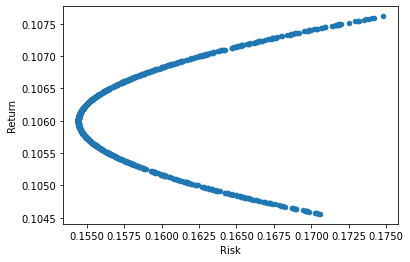

In [104]:
port_data.plot(x='Risk',y='Return', kind='scatter')

# CAPM

## Beta

In [105]:
ticker_l = ['PG', '^GSPC']

sec_data = pd.DataFrame()

for t in ticker_l:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1', end='2016-12-31')['Adj Close'] # 5 years for beta calculation

In [107]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [108]:
sec_returns.head()

PG     ^GSPC
Date                          
2012-01-03       NaN       NaN
2012-01-04 -0.000449  0.000188
2012-01-05 -0.004200  0.002939
2012-01-06 -0.002408 -0.002540
2012-01-09  0.004210  0.002259

In [109]:
sec_cov_market = sec_returns.cov().iloc[0,1] *250

In [110]:
market_var = sec_returns['^GSPC'].var() * 250

In [111]:
beta = sec_cov_market / market_var

In [113]:
print(f'Stock Beta: {beta}') # less than 1 means defensive stock

Stock Beta: 0.6159590815222601


# let's calculate expected return for security

In [114]:
risk_free_rate = 0.025
market_risk_premium = 0.05 # market return - risk free return

ex_ret = risk_free_rate + beta * market_risk_premium
print(f'Expected Return: {ex_ret}')

Expected Return: 0.05579795407611301


In [117]:
pg_real_return  = sec_returns['PG'].mean()*250
print(f'PG Real return VS Expected {pg_real_return - ex_ret}')

PG Real return VS Expected 0.021585063158078698


# Sharpe Ratio

In [118]:
sharpe = (ex_ret - risk_free_rate) / ( sec_returns['PG'].std()*250**0.5)

In [119]:
print(f'Sharpe Ratio {sharpe}')

Sharpe Ratio 0.21558128473911914
